<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


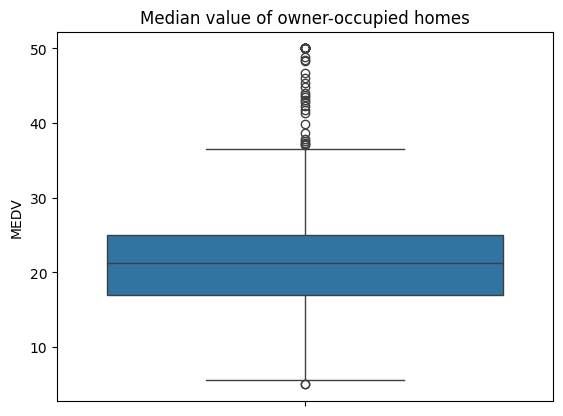

In [5]:
#Boxplot to show the "Median value of owner-occupied homes" 

ax = sns.boxplot(y="MEDV", data=boston_df).set_title("Median value of owner-occupied homes")
pyplot.show()

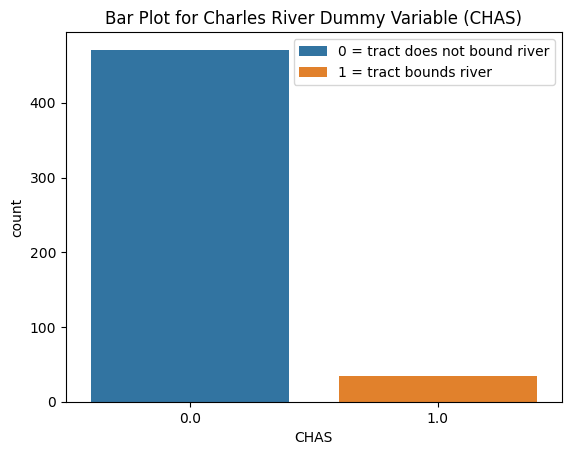

In [6]:
#Barplot to show the "Charles river variable"

sns.countplot(x='CHAS', data=boston_df, hue="CHAS").set_title('Bar Plot for Charles River Dummy Variable (CHAS)'); pyplot.legend(['0 = tract does not bound river', '1 = tract bounds river'], loc='upper right')

pyplot.show()

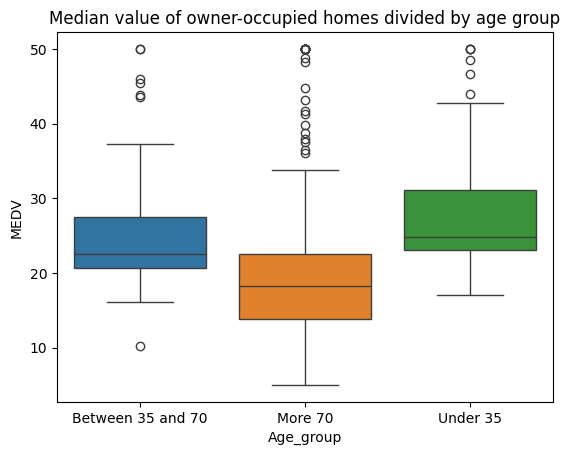

In [7]:
#Boxplot to show the MEDV variable divided for the AGE groups

boston_df.loc[boston_df["AGE"]<35, "Age_group"] = "Under 35"
boston_df.loc[(boston_df["AGE"]>35) & (boston_df["AGE"] <70),"Age_group"] = "Between 35 and 70"
boston_df.loc[boston_df["AGE"]>70,"Age_group"] = "More 70"

boston_df[boston_df['Age_group'] == "Under 35"]["MEDV"]
boston_df[boston_df['Age_group'] == "Between 35 and 70"]["MEDV"] 
boston_df[boston_df['Age_group'] == "More 70"]["MEDV"]

ax = sns.boxplot(x="Age_group", y="MEDV", hue="Age_group", data=boston_df).set_title("Median value of owner-occupied homes divided by age group")

pyplot.show()

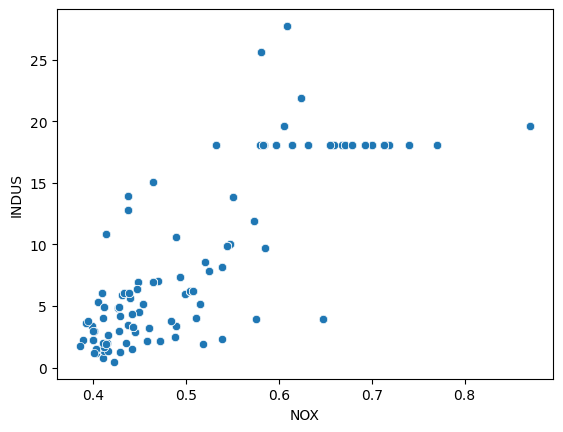

In [8]:
#Scatterplot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

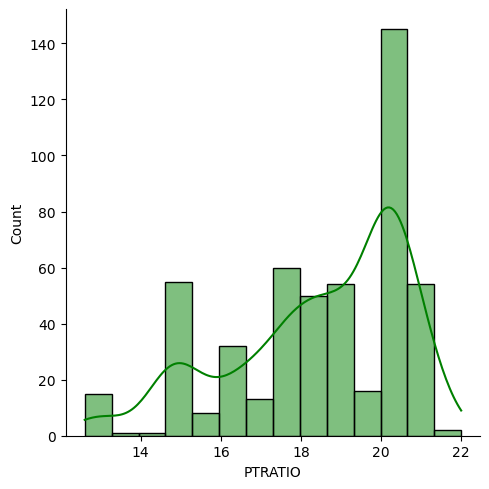

In [9]:
#Histogram for the pupil to teacher ratio variable

ax = sns.displot(boston_df['PTRATIO'],
                 kde=True,
                 color='green',
                 alpha=0.5)

In [10]:
# Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?(T-test for independent samples)
# Null hypothesis: there is no significant difference in median value of houses bounded by the Charles river.

scipy.stats.levene(boston_df[boston_df['CHAS'] == False]['MEDV'],
                   boston_df[boston_df['CHAS'] == True]['MEDV'], center='median')

# Answer : Since p-value < 0.05, then we can identify disequality of variance, and so we can proceed with the T test setting equal_var to False.

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == False]['MEDV'],
                   boston_df[boston_df['CHAS'] == True]['MEDV'], equal_var = False)

# Since p-value < 0.05, we can identify disequality of MEDV variable based on CHAS variable.

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [12]:
# Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Null hypothesis: there is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

lm = ols('MEDV ~ Age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

# Answer : Since p-value < 0.05, then there is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

              df        sum_sq      mean_sq         F        PR(>F)
Age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


In [13]:
# Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?(Pearson Correlation) 
# Null hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Answer : Since p-value < 0.05, then there is a relationship between NOX and INDUS variable. 

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [15]:
# Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?(Regeression Analysis)

X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

# Answer : Since p-value < 0.05, then there is a correlation between the two variables. The DIS coef shows us that for every additional unit increase in DIS, the median value of owner-occupied homes will increase by approximately 1.0916 units.
# R-squared shows us that 6.2% of the variability in the median value of owner-occupied homes is explained by the weighted distance to the five Boston employment centres.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        11:08:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""